# Exploratory Data Analysis (EDA) - Titanic

## Import Modules

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [56]:
df = sns.load_dataset('titanic')

## First Overview

### Show first and last rows and some samples

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [41]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
409,0,3,female,NaN,3,1,25.4667,S,Third,woman,False,NaN,Southampton,no,False
348,1,3,male,3.0,1,1,15.9000,S,Third,child,False,NaN,Southampton,yes,False
832,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
286,1,3,male,30.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


### Check the structure

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Statistical aggregation of numeric columns

In [43]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyse missing values
The Titanic database has some missing values which requires imputation of data.

In [44]:
stats = {
    "missing": df.isnull().sum(),
    "missing_percentage":  df.isnull().mean() * 100
}
df_stats = pd.DataFrame(stats)
df_stats

,missing,missing_percentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


## Univariate Analysis (Distribution by variables)

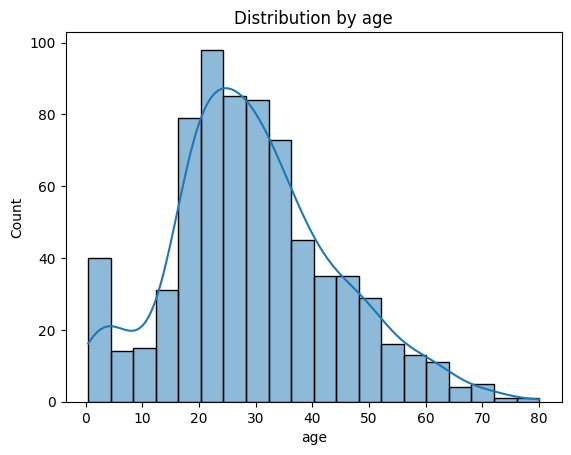

In [45]:
# Distribution by age
sns.histplot(df['age'], kde=True)
plt.title('Distribution by age')
plt.show()

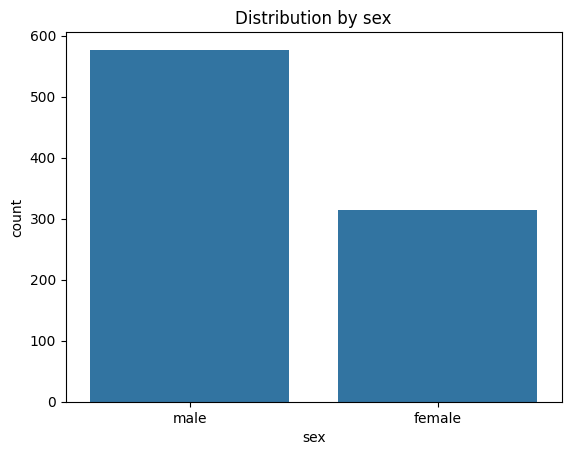

In [46]:
# Distribution by sex
sns.countplot(x='sex', data=df)
plt.title('Distribution by sex')
plt.show()

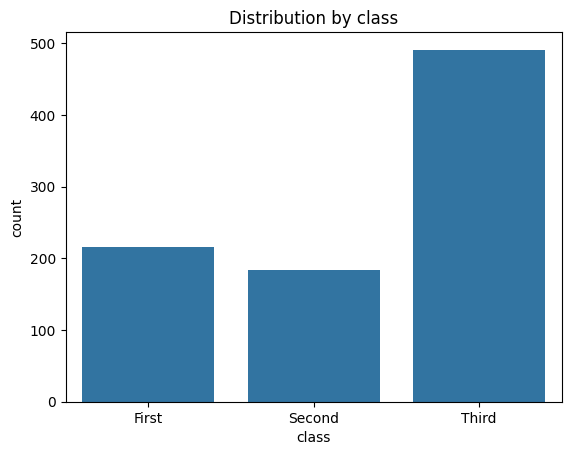

In [47]:
# Distribution by class
sns.countplot(x='class', data=df)
plt.title('Distribution by class')
plt.show()

## Bivariate Analysis (correlation between two variables)

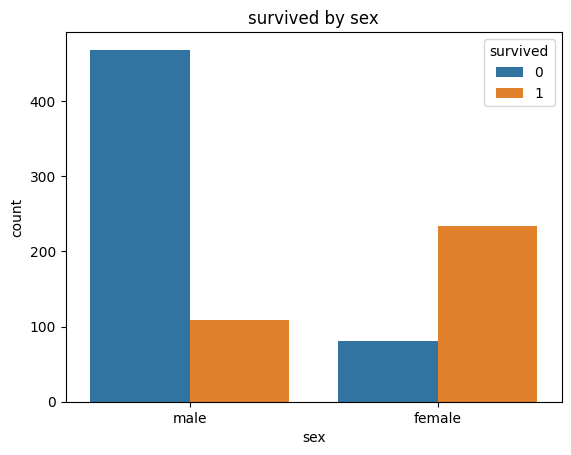

In [48]:
# survived by sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title('survived by sex')
plt.show()

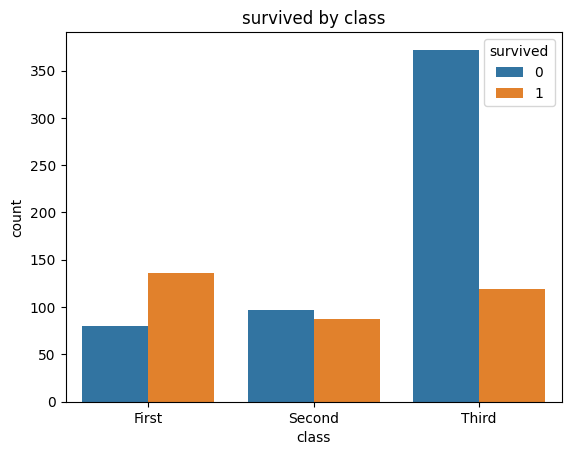

In [49]:
# survived by class
sns.countplot(x='class', hue='survived', data=df)
plt.title('survived by class')
plt.show()

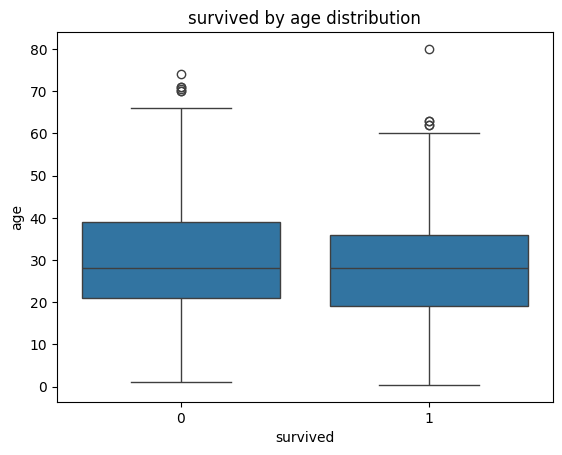

In [50]:
# survived by age distribution
sns.boxplot(x='survived', y='age', data=df)
plt.title('survived by age distribution')
plt.show()

## Encode categorical variables

In [57]:
# Transform the variables "sex" and "embarked" in numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['who'] = df['who'].map({'man': 0, 'woman': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

df.head()  # check for success

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,2.0,3,0.0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,0.0,1,1.0,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,2.0,3,1.0,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,2.0,1,1.0,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,2.0,3,0.0,True,NaN,Southampton,no,True


## Replace missing values with imputation

In [33]:
df['age'] = df['age'].fillna(df['age'].median())  # replace 'age' with the median value
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])  # replace with the most occuring value

df.isnull().sum()  # check, if all missing values are replaced

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

## Correlation between numeric variables

### Heatmap

<Axes: >

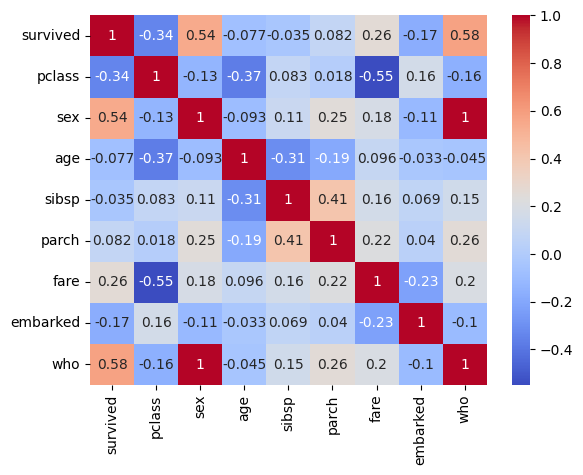

In [64]:
corr = df.select_dtypes('number').corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

### Pairplot

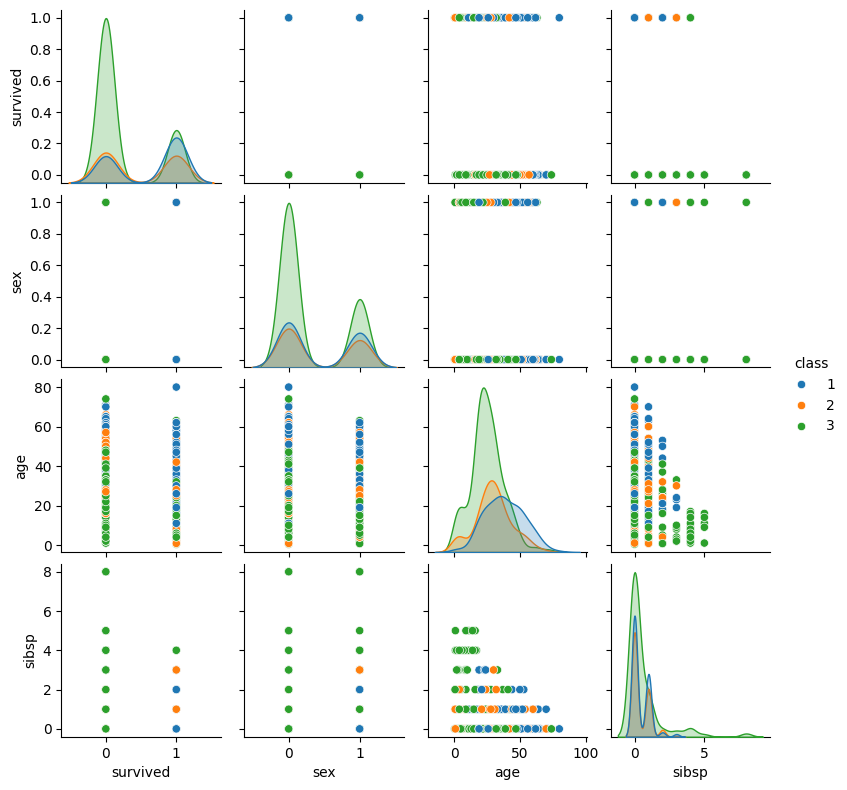

In [72]:
df_selected = df[['survived', 'class', 'sex', 'age', 'sibsp', 'deck']]
sns.pairplot(df_selected, hue="class", height=2)

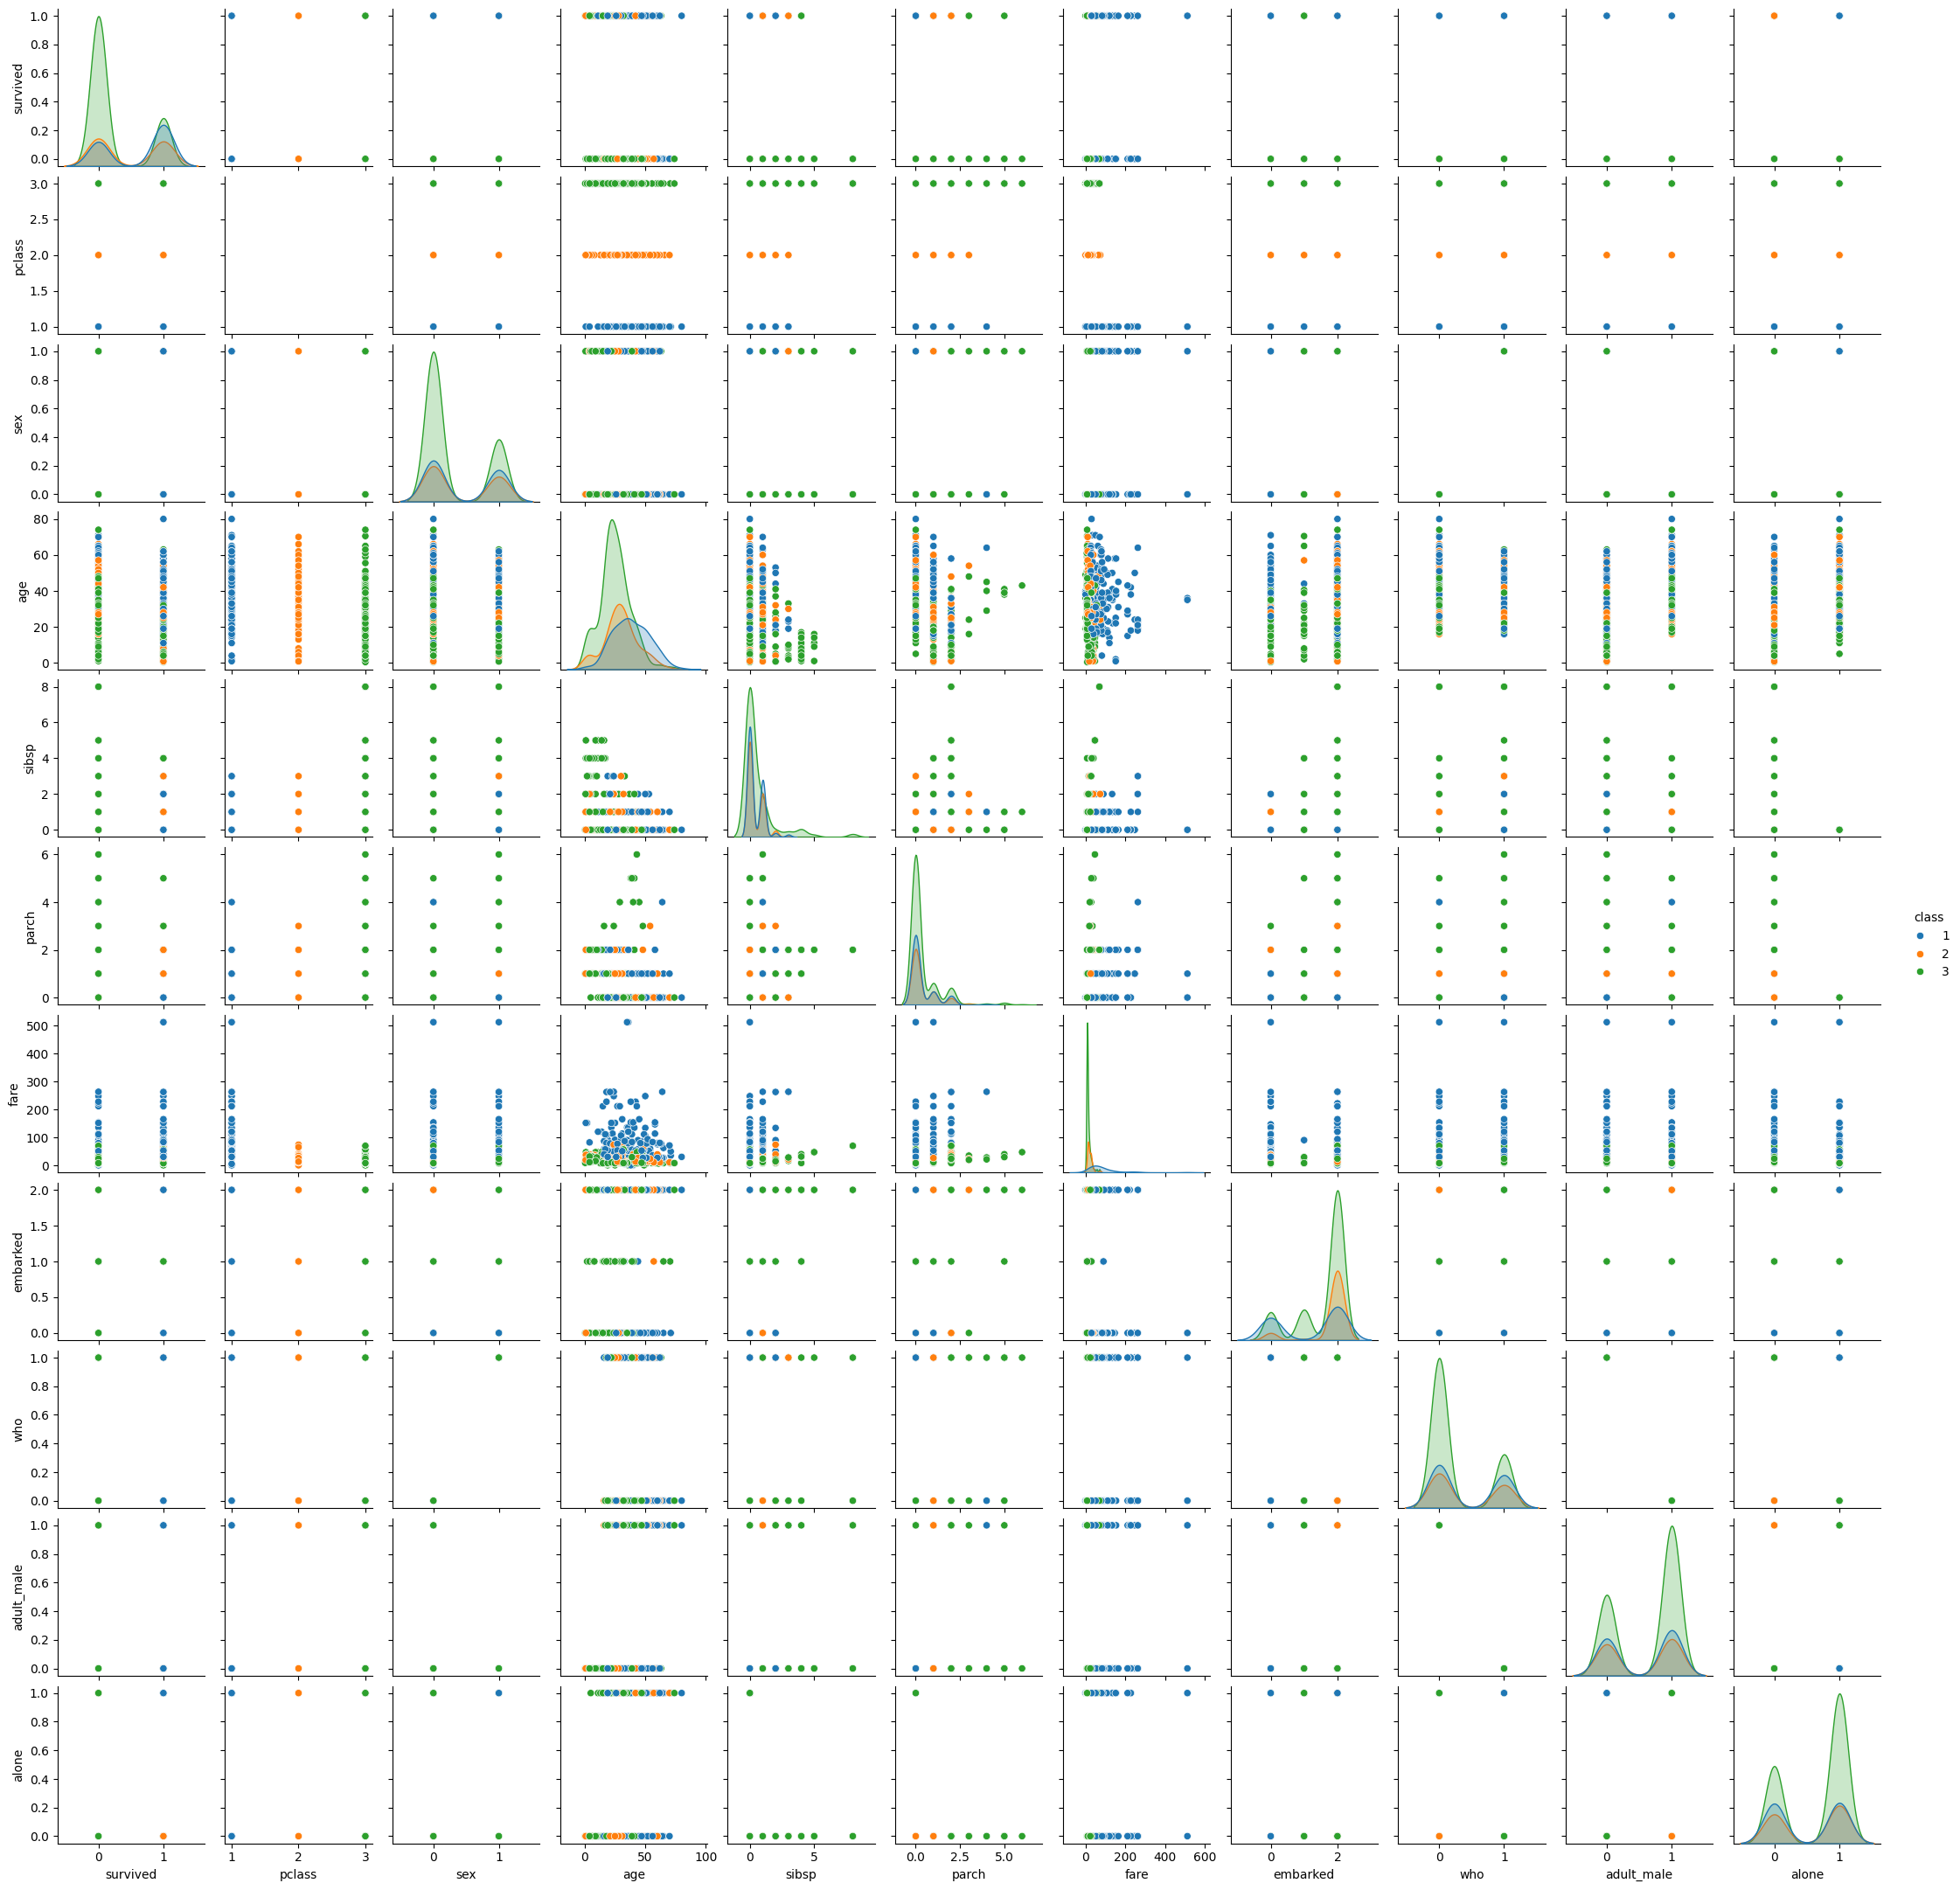

In [68]:
sns.pairplot(df, hue="class", height=2)